# Project 7

## Sys Ops

In [1]:
cd ..

C:\Users\rudyg\Documents\GitHub\P7-ML


In [2]:
pwd

'C:\\Users\\rudyg\\Documents\\GitHub\\P7-ML'

## Imports 

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [4]:
# DO NOT REMOVE THIS LINE

## Data

In [5]:
fn = "application_train.csv"
df = pd.read_csv("./data/source/" + fn)

In [6]:
df.shape

(307511, 122)

In [7]:
df = df.sample(frac=0.10)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
46897,154320,0,Cash loans,F,Y,N,0,157500.0,545040.0,17842.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
256197,396460,1,Cash loans,F,N,Y,0,157500.0,436032.0,29268.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
139852,262167,0,Cash loans,F,N,N,1,144000.0,71316.0,8176.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
280583,425057,0,Cash loans,F,N,Y,0,90000.0,675000.0,19867.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
38907,145064,0,Cash loans,M,N,N,0,225000.0,1006920.0,39933.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105045,221897,0,Cash loans,F,N,N,0,157500.0,270000.0,13783.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
193587,324488,0,Cash loans,F,N,Y,1,99000.0,107820.0,8473.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
25828,130027,0,Cash loans,F,N,Y,0,315000.0,521280.0,44725.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,8.0
106372,223407,0,Cash loans,F,N,N,0,67500.0,450000.0,27193.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [8]:
# filter for correl
# df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(
    [
        "TARGET",
        "NAME_CONTRACT_TYPE",
        "CODE_GENDER",
        "FLAG_OWN_CAR",
        "FLAG_OWN_REALTY",
        "CNT_CHILDREN",
        "AMT_INCOME_TOTAL",
        "AMT_CREDIT",
        "AMT_ANNUITY",
        "AMT_GOODS_PRICE",
        "NAME_TYPE_SUITE",
        "NAME_INCOME_TYPE",
        "NAME_EDUCATION_TYPE",
        "NAME_FAMILY_STATUS",
        "NAME_HOUSING_TYPE",
        "DAYS_BIRTH",
        "DAYS_EMPLOYED",
        "ORGANIZATION_TYPE",
        "OCCUPATION_TYPE",
        "EXT_SOURCE_1",
        "EXT_SOURCE_2",
        "EXT_SOURCE_3",
    ]
)


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
46897,0,Cash loans,F,Y,N,0,157500.0,545040.0,17842.5,450000.0,...,Higher education,Single / not married,House / apartment,-10864,-1307,Housing,NaN,NaN,0.610467,0.431192
256197,1,Cash loans,F,N,Y,0,157500.0,436032.0,29268.0,360000.0,...,Higher education,Single / not married,House / apartment,-15926,-1970,Business Entity Type 3,NaN,0.853504,0.019008,NaN
139852,0,Cash loans,F,N,N,1,144000.0,71316.0,8176.5,63000.0,...,Secondary / secondary special,Married,House / apartment,-15708,-357,Other,High skill tech staff,NaN,0.613811,0.542445
280583,0,Cash loans,F,N,Y,0,90000.0,675000.0,19867.5,675000.0,...,Secondary / secondary special,Separated,House / apartment,-23003,365243,XNA,NaN,NaN,0.649168,0.554947
38907,0,Cash loans,M,N,N,0,225000.0,1006920.0,39933.0,900000.0,...,Secondary / secondary special,Married,House / apartment,-14548,-3366,Electricity,Laborers,NaN,0.264635,0.572683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105045,0,Cash loans,F,N,N,0,157500.0,270000.0,13783.5,270000.0,...,Secondary / secondary special,Widow,Municipal apartment,-22216,365243,XNA,NaN,0.433932,0.697425,NaN
193587,0,Cash loans,F,N,Y,1,99000.0,107820.0,8473.5,90000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-12536,-3334,Military,Laborers,NaN,0.448123,0.683269
25828,0,Cash loans,F,N,Y,0,315000.0,521280.0,44725.5,450000.0,...,Higher education,Single / not married,House / apartment,-12414,-1315,Business Entity Type 3,NaN,0.618792,0.605344,0.362277
106372,0,Cash loans,F,N,N,0,67500.0,450000.0,27193.5,450000.0,...,Secondary / secondary special,Married,House / apartment,-8757,-618,Self-employed,Sales staff,NaN,0.615644,0.424130


## EDA Exploratory Data Analysis

In [9]:
df.sort_values("AMT_INCOME_TOTAL", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
246858,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,130945.5,1368000.0,...,Higher education,Married,House / apartment,-13551,-280,Business Entity Type 3,NaN,NaN,0.713507,NaN
278212,0,Cash loans,M,Y,Y,0,2250000.0,1506816.0,49927.5,1350000.0,...,Higher education,Married,House / apartment,-14318,-5379,Police,Core staff,NaN,0.643033,0.795803
195807,0,Revolving loans,M,Y,Y,0,2250000.0,1350000.0,67500.0,1350000.0,...,Higher education,Married,House / apartment,-17229,-761,Business Entity Type 3,NaN,NaN,0.741421,0.863363
35572,0,Cash loans,F,Y,Y,1,2025000.0,733315.5,41076.0,679500.0,...,Higher education,Married,House / apartment,-8312,-813,Business Entity Type 3,Sales staff,0.465245,0.647443,NaN
304477,0,Cash loans,F,Y,Y,1,2025000.0,935640.0,93487.5,900000.0,...,Higher education,Married,House / apartment,-15532,-953,Business Entity Type 3,Managers,NaN,0.759875,0.676993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98352,0,Cash loans,F,N,Y,0,27000.0,188685.0,8311.5,157500.0,...,Secondary / secondary special,Married,House / apartment,-20897,365243,XNA,NaN,NaN,0.304923,0.656158
124146,0,Cash loans,F,N,Y,0,27000.0,71955.0,7245.0,67500.0,...,Secondary / secondary special,Widow,House / apartment,-18113,-1118,Housing,Accountants,NaN,0.520355,0.718033
10585,0,Cash loans,F,N,N,0,27000.0,225000.0,9531.0,225000.0,...,Secondary / secondary special,Married,With parents,-18707,-161,Kindergarten,Laborers,NaN,0.753233,0.576209
18548,1,Cash loans,F,N,N,0,27000.0,225000.0,19309.5,225000.0,...,Higher education,Civil marriage,House / apartment,-14869,-5067,Kindergarten,Managers,0.735812,0.718655,NaN


In [10]:
df.sort_values("AMT_CREDIT", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
14852,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,...,Higher education,Married,Office apartment,-12796,-1372,Trade: type 7,Managers,0.246776,0.639547,0.805020
48690,0,Cash loans,F,N,Y,2,225117.0,2700000.0,66798.0,2700000.0,...,Higher education,Married,House / apartment,-14048,-205,Business Entity Type 3,Managers,0.514343,0.600811,0.707699
153735,0,Cash loans,F,N,Y,1,450000.0,2695500.0,77382.0,2250000.0,...,Higher education,Married,House / apartment,-14936,-165,Business Entity Type 3,NaN,NaN,0.634039,0.463275
150167,0,Cash loans,M,Y,Y,2,405000.0,2695500.0,71235.0,2250000.0,...,Higher education,Married,House / apartment,-13308,-1285,Bank,Managers,0.255959,0.257046,0.691021
265750,0,Cash loans,F,Y,N,0,292500.0,2695500.0,74254.5,2250000.0,...,Higher education,Civil marriage,House / apartment,-20576,-1538,Other,Managers,0.818978,0.703390,0.631355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16448,0,Cash loans,M,Y,Y,1,135000.0,45000.0,4450.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-10625,-3201,Military,Managers,0.448635,0.568667,0.742182
148649,1,Cash loans,M,N,N,0,135000.0,45000.0,3271.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-18231,-949,Self-employed,Laborers,0.218905,0.188741,0.062103
61194,0,Cash loans,F,N,N,0,90000.0,45000.0,4774.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-10952,-174,Business Entity Type 3,Sales staff,0.216653,0.391973,0.404878
299192,0,Cash loans,F,N,N,0,135000.0,45000.0,4450.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-20226,365243,XNA,NaN,NaN,0.706324,0.558507


In [11]:
df.sort_values("AMT_ANNUITY", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
20119,0,Revolving loans,F,Y,Y,0,675000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,Rented apartment,-16004,-795,Business Entity Type 3,Managers,0.823903,0.649701,0.150085
132913,0,Revolving loans,F,N,Y,3,675000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-14827,-2693,Business Entity Type 3,NaN,0.847550,0.646549,NaN
141371,0,Revolving loans,M,Y,Y,3,1350000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-16790,-1626,Trade: type 2,Managers,0.575695,0.744528,NaN
165190,0,Revolving loans,M,Y,Y,4,765000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-14747,-5516,Industry: type 2,Managers,NaN,0.253144,0.834784
111186,0,Cash loans,M,Y,Y,0,427500.0,2303460.0,213160.5,2250000.0,...,Higher education,Married,House / apartment,-21818,-8743,Business Entity Type 3,Managers,NaN,0.779138,0.698668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203469,0,Cash loans,F,N,Y,0,112500.0,62820.0,2893.5,45000.0,...,Lower secondary,Single / not married,House / apartment,-16579,-5011,Insurance,Laborers,NaN,0.478727,NaN
61962,0,Cash loans,F,Y,Y,1,112500.0,54000.0,2754.0,54000.0,...,Higher education,Married,House / apartment,-16652,-7012,School,Managers,NaN,0.540434,0.807274
81179,0,Cash loans,F,N,Y,0,90000.0,68760.0,2722.5,45000.0,...,Secondary / secondary special,Married,House / apartment,-22020,365243,XNA,NaN,NaN,0.191526,0.413597
255874,1,Cash loans,F,N,Y,0,67500.0,53910.0,2722.5,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-23790,365243,XNA,NaN,NaN,0.512240,0.641368


In [12]:
df.sort_values("AMT_GOODS_PRICE", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
14852,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,4050000.0,...,Higher education,Married,Office apartment,-12796,-1372,Trade: type 7,Managers,0.246776,0.639547,0.805020
48690,0,Cash loans,F,N,Y,2,225117.0,2700000.0,66798.0,2700000.0,...,Higher education,Married,House / apartment,-14048,-205,Business Entity Type 3,Managers,0.514343,0.600811,0.707699
240334,1,Cash loans,F,N,N,0,117000.0,2281500.0,65128.5,2281500.0,...,Secondary / secondary special,Married,House / apartment,-16057,-2814,Self-employed,High skill tech staff,0.685213,0.650954,NaN
1243,0,Cash loans,M,Y,N,1,247891.5,2254500.0,65988.0,2254500.0,...,Higher education,Married,House / apartment,-11361,-1252,Trade: type 7,Sales staff,0.236611,0.540325,NaN
37878,0,Cash loans,F,Y,Y,0,266089.5,2370559.5,84271.5,2254500.0,...,Higher education,Single / not married,House / apartment,-19625,-376,Government,Managers,NaN,0.406658,0.786267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214803,1,Revolving loans,F,N,Y,2,90000.0,180000.0,9000.0,NaN,...,Secondary / secondary special,Married,House / apartment,-14016,-3964,Business Entity Type 3,Laborers,0.576595,0.635945,0.355639
30164,0,Revolving loans,F,N,Y,1,121500.0,405000.0,20250.0,NaN,...,Higher education,Married,House / apartment,-10168,-759,School,Core staff,0.644572,0.709507,0.798137
136424,0,Revolving loans,F,N,Y,0,90000.0,180000.0,9000.0,NaN,...,Secondary / secondary special,Married,House / apartment,-19428,-238,Business Entity Type 2,Laborers,NaN,0.670407,0.362277
124123,0,Revolving loans,M,N,Y,0,157500.0,202500.0,10125.0,NaN,...,Secondary / secondary special,Married,House / apartment,-15911,-6468,Self-employed,Managers,NaN,0.639995,NaN


In [13]:
# on exclut ces lignes car elles font planter le fit

df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Businessman')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Maternity leave')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Student')].index)
df = df.drop(df[(df['NAME_INCOME_TYPE'] == 'Unemployed')].index)

df = df.drop(df[(df['NAME_FAMILY_STATUS'] == 'Unknown')].index)

df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
46897,0,Cash loans,F,Y,N,0,157500.0,545040.0,17842.5,450000.0,...,Higher education,Single / not married,House / apartment,-10864,-1307,Housing,NaN,NaN,0.610467,0.431192
256197,1,Cash loans,F,N,Y,0,157500.0,436032.0,29268.0,360000.0,...,Higher education,Single / not married,House / apartment,-15926,-1970,Business Entity Type 3,NaN,0.853504,0.019008,NaN
139852,0,Cash loans,F,N,N,1,144000.0,71316.0,8176.5,63000.0,...,Secondary / secondary special,Married,House / apartment,-15708,-357,Other,High skill tech staff,NaN,0.613811,0.542445
280583,0,Cash loans,F,N,Y,0,90000.0,675000.0,19867.5,675000.0,...,Secondary / secondary special,Separated,House / apartment,-23003,365243,XNA,NaN,NaN,0.649168,0.554947
38907,0,Cash loans,M,N,N,0,225000.0,1006920.0,39933.0,900000.0,...,Secondary / secondary special,Married,House / apartment,-14548,-3366,Electricity,Laborers,NaN,0.264635,0.572683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105045,0,Cash loans,F,N,N,0,157500.0,270000.0,13783.5,270000.0,...,Secondary / secondary special,Widow,Municipal apartment,-22216,365243,XNA,NaN,0.433932,0.697425,NaN
193587,0,Cash loans,F,N,Y,1,99000.0,107820.0,8473.5,90000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-12536,-3334,Military,Laborers,NaN,0.448123,0.683269
25828,0,Cash loans,F,N,Y,0,315000.0,521280.0,44725.5,450000.0,...,Higher education,Single / not married,House / apartment,-12414,-1315,Business Entity Type 3,NaN,0.618792,0.605344,0.362277
106372,0,Cash loans,F,N,N,0,67500.0,450000.0,27193.5,450000.0,...,Secondary / secondary special,Married,House / apartment,-8757,-618,Self-employed,Sales staff,NaN,0.615644,0.424130


In [14]:
df.sort_values("DAYS_BIRTH", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
168135,0,Cash loans,F,N,Y,0,90000.0,225000.0,17905.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-7673,-440,Other,NaN,NaN,0.302255,NaN
173803,0,Revolving loans,F,N,Y,1,72000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Married,With parents,-7678,-990,Self-employed,NaN,NaN,0.316462,NaN
124856,0,Revolving loans,F,N,Y,0,112500.0,135000.0,6750.0,135000.0,...,Incomplete higher,Single / not married,Rented apartment,-7680,-141,Kindergarten,NaN,0.182625,0.509114,0.317032
73870,0,Cash loans,M,N,Y,0,94050.0,900297.0,24754.5,751500.0,...,Incomplete higher,Single / not married,House / apartment,-7680,-852,Trade: type 2,Core staff,0.370862,0.517374,0.553165
249615,0,Cash loans,F,N,Y,0,157905.0,528952.5,13950.0,418473.0,...,Incomplete higher,Civil marriage,With parents,-7680,-431,Trade: type 2,Core staff,0.156435,0.578444,0.265049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282039,0,Cash loans,F,N,Y,0,117000.0,239850.0,23494.5,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25167,365243,XNA,NaN,NaN,0.587714,NaN
164069,0,Cash loans,F,N,Y,0,135000.0,284256.0,28111.5,270000.0,...,Secondary / secondary special,Widow,House / apartment,-25170,365243,XNA,NaN,NaN,0.788344,0.768808
187478,0,Cash loans,F,N,N,0,90000.0,171000.0,16785.0,171000.0,...,Secondary / secondary special,Widow,House / apartment,-25177,365243,XNA,NaN,NaN,0.353175,0.846378
130865,0,Cash loans,F,Y,N,0,157500.0,225000.0,21276.0,225000.0,...,Secondary / secondary special,Widow,House / apartment,-25179,365243,XNA,NaN,NaN,0.410499,NaN


In [15]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
56667,0,Cash loans,F,Y,N,0,90000.0,450000.0,31320.0,450000.0,...,Secondary / secondary special,Married,House / apartment,-22223,365243,XNA,NaN,0.799242,0.488529,0.651260
233322,0,Cash loans,F,N,N,0,81000.0,284400.0,16011.0,225000.0,...,Higher education,Married,House / apartment,-23881,365243,XNA,NaN,NaN,0.361597,0.799297
209574,0,Cash loans,F,Y,Y,0,45000.0,67500.0,4509.0,67500.0,...,Secondary / secondary special,Married,House / apartment,-19400,365243,XNA,NaN,NaN,0.658998,0.199771
56043,0,Cash loans,F,N,Y,0,162000.0,604152.0,25596.0,540000.0,...,Secondary / secondary special,Married,House / apartment,-21860,365243,XNA,NaN,0.770246,0.163187,0.558507
281146,0,Cash loans,M,Y,Y,0,112500.0,787131.0,26145.0,679500.0,...,Secondary / secondary special,Married,House / apartment,-22195,365243,XNA,NaN,NaN,0.583899,0.768808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280840,0,Cash loans,F,N,Y,0,180000.0,562500.0,37741.5,562500.0,...,Secondary / secondary special,Widow,House / apartment,-23431,-16266,Services,Private service staff,0.922086,0.265048,NaN
40449,0,Cash loans,F,N,Y,0,112500.0,299772.0,10894.5,247500.0,...,Secondary / secondary special,Widow,House / apartment,-23739,-16314,Medicine,Medicine staff,NaN,0.612089,0.753067
143266,0,Cash loans,F,N,Y,0,202500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25200,-16651,Medicine,Medicine staff,NaN,0.713440,0.802745
273069,0,Cash loans,F,N,Y,0,135000.0,254700.0,14751.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24468,-17583,Medicine,Laborers,NaN,0.745650,0.832785


In [16]:
df.loc[df["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = float("NaN")

In [17]:
df.sort_values("DAYS_EMPLOYED", ascending=False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
161893,0,Cash loans,F,N,N,0,157500.0,1012500.0,43029.0,1012500.0,...,Secondary / secondary special,Married,House / apartment,-18617,-2.0,Industry: type 11,Laborers,NaN,0.032957,0.691021
247112,0,Cash loans,F,N,N,0,67500.0,808650.0,23643.0,675000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-20794,-3.0,Business Entity Type 3,Laborers,0.684103,0.773844,0.588488
17355,1,Cash loans,F,N,N,1,225000.0,754740.0,24475.5,630000.0,...,Higher education,Married,House / apartment,-11199,-4.0,Kindergarten,Drivers,NaN,0.510765,0.028876
192165,1,Cash loans,F,Y,N,0,81000.0,225000.0,15219.0,225000.0,...,Higher education,Married,House / apartment,-12422,-9.0,Transport: type 4,Accountants,0.399397,0.530077,0.643026
210300,1,Cash loans,M,N,N,0,450000.0,485640.0,38938.5,450000.0,...,Secondary / secondary special,Married,House / apartment,-10883,-16.0,Business Entity Type 3,High skill tech staff,0.168723,0.704220,0.119878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266178,0,Cash loans,F,N,Y,0,166500.0,1288350.0,37800.0,1125000.0,...,Secondary / secondary special,Married,House / apartment,-23107,NaN,XNA,NaN,NaN,0.613842,0.391055
67127,0,Cash loans,M,Y,N,0,225000.0,900000.0,26316.0,900000.0,...,Secondary / secondary special,Widow,House / apartment,-22020,NaN,XNA,NaN,NaN,0.728465,0.479449
48592,0,Cash loans,F,N,Y,0,28575.0,47970.0,4743.0,45000.0,...,Secondary / secondary special,Married,House / apartment,-23355,NaN,XNA,NaN,NaN,0.728344,0.799297
105045,0,Cash loans,F,N,N,0,157500.0,270000.0,13783.5,270000.0,...,Secondary / secondary special,Widow,Municipal apartment,-22216,NaN,XNA,NaN,0.433932,0.697425,NaN


In [18]:
df.sort_values("DAYS_EMPLOYED", ascending=True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
280994,0,Cash loans,F,Y,Y,0,180000.0,225000.0,21919.5,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-24577,-17912.0,Business Entity Type 3,High skill tech staff,NaN,0.479753,0.652897
273069,0,Cash loans,F,N,Y,0,135000.0,254700.0,14751.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-24468,-17583.0,Medicine,Laborers,NaN,0.745650,0.832785
143266,0,Cash loans,F,N,Y,0,202500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25200,-16651.0,Medicine,Medicine staff,NaN,0.713440,0.802745
40449,0,Cash loans,F,N,Y,0,112500.0,299772.0,10894.5,247500.0,...,Secondary / secondary special,Widow,House / apartment,-23739,-16314.0,Medicine,Medicine staff,NaN,0.612089,0.753067
280840,0,Cash loans,F,N,Y,0,180000.0,562500.0,37741.5,562500.0,...,Secondary / secondary special,Widow,House / apartment,-23431,-16266.0,Services,Private service staff,0.922086,0.265048,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266178,0,Cash loans,F,N,Y,0,166500.0,1288350.0,37800.0,1125000.0,...,Secondary / secondary special,Married,House / apartment,-23107,NaN,XNA,NaN,NaN,0.613842,0.391055
67127,0,Cash loans,M,Y,N,0,225000.0,900000.0,26316.0,900000.0,...,Secondary / secondary special,Widow,House / apartment,-22020,NaN,XNA,NaN,NaN,0.728465,0.479449
48592,0,Cash loans,F,N,Y,0,28575.0,47970.0,4743.0,45000.0,...,Secondary / secondary special,Married,House / apartment,-23355,NaN,XNA,NaN,NaN,0.728344,0.799297
105045,0,Cash loans,F,N,N,0,157500.0,270000.0,13783.5,270000.0,...,Secondary / secondary special,Widow,Municipal apartment,-22216,NaN,XNA,NaN,0.433932,0.697425,NaN


In [19]:
df.loc[df["ORGANIZATION_TYPE"] == "XNA", "ORGANIZATION_TYPE"] = float("NaN")

In [20]:
df.TARGET.value_counts(normalize=True)

TARGET
0    0.91999
1    0.08001
Name: proportion, dtype: float64

In [21]:
df.TARGET.value_counts()

TARGET
0    28286
1     2460
Name: count, dtype: int64

In [22]:
# Transformations

df.loc[df["CODE_GENDER"] == "M", "CODE_GENDER"] = 1
df.loc[df["CODE_GENDER"] == "F", "CODE_GENDER"] = 2
df.loc[df["CODE_GENDER"] == "XNA", "CODE_GENDER"] = 2

# on transforme la colonne CODE_GENDER en int
df.CODE_GENDER = df.CODE_GENDER.astype("int")

df.loc[df["FLAG_OWN_CAR"] == "Y", "FLAG_OWN_CAR"] = 1
df.loc[df["FLAG_OWN_CAR"] == "N", "FLAG_OWN_CAR"] = 0

# on transforme la colonne FLAG_OWN_CAR en int
df.FLAG_OWN_CAR = df.FLAG_OWN_CAR.astype("int")

df.loc[df["FLAG_OWN_REALTY"] == "Y", "FLAG_OWN_REALTY"] = 1
df.loc[df["FLAG_OWN_REALTY"] == "N", "FLAG_OWN_REALTY"] = 0

# on transforme la colonne FLAG_OWN_REALTY en int
df.FLAG_OWN_REALTY = df.FLAG_OWN_REALTY.astype("int")

df.DAYS_BIRTH = -df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = -df.DAYS_EMPLOYED / 365

df.dtypes

TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER              int32
FLAG_OWN_CAR             int32
FLAG_OWN_REALTY          int32
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
ORGANIZATION_TYPE       object
OCCUPATION_TYPE         object
EXT_SOURCE_1           float64
EXT_SOURCE_2           float64
EXT_SOURCE_3           float64
dtype: object

In [23]:
df.isna().mean()

TARGET                 0.000000
NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
AMT_CREDIT             0.000000
AMT_ANNUITY            0.000000
AMT_GOODS_PRICE        0.000716
NAME_TYPE_SUITE        0.004163
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.182007
ORGANIZATION_TYPE      0.182007
OCCUPATION_TYPE        0.315358
EXT_SOURCE_1           0.562317
EXT_SOURCE_2           0.002179
EXT_SOURCE_3           0.199961
dtype: float64

In [24]:
df.select_dtypes(include="object").nunique()

NAME_CONTRACT_TYPE      2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        4
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
ORGANIZATION_TYPE      57
OCCUPATION_TYPE        18
dtype: int64

In [25]:
df["nan_EXT_SOURCE_1"] = df.EXT_SOURCE_1.isna().astype("int")

# on exclut ORGANIZATION_TYPE, OCCUPATION_TYPE, EXT_SOURCE_1 car trop de NaN
df.drop(
    columns=["ORGANIZATION_TYPE", "OCCUPATION_TYPE", "EXT_SOURCE_1"],
    inplace=True,
    errors="ignore",
)

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
46897,0,Cash loans,2,1,0,0,157500.0,545040.0,17842.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,29.764384,3.580822,0.610467,0.431192,1
256197,1,Cash loans,2,0,1,0,157500.0,436032.0,29268.0,360000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,43.632877,5.397260,0.019008,NaN,0
139852,0,Cash loans,2,0,0,1,144000.0,71316.0,8176.5,63000.0,Family,Working,Secondary / secondary special,Married,House / apartment,43.035616,0.978082,0.613811,0.542445,1
280583,0,Cash loans,2,0,1,0,90000.0,675000.0,19867.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,63.021918,NaN,0.649168,0.554947,1
38907,0,Cash loans,1,0,0,0,225000.0,1006920.0,39933.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,39.857534,9.221918,0.264635,0.572683,1


In [26]:
# df.corr()

In [27]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
46897,0,Cash loans,2,1,0,0,157500.0,545040.0,17842.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,29.764384,3.580822,0.610467,0.431192,1
256197,1,Cash loans,2,0,1,0,157500.0,436032.0,29268.0,360000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,43.632877,5.397260,0.019008,NaN,0
139852,0,Cash loans,2,0,0,1,144000.0,71316.0,8176.5,63000.0,Family,Working,Secondary / secondary special,Married,House / apartment,43.035616,0.978082,0.613811,0.542445,1
280583,0,Cash loans,2,0,1,0,90000.0,675000.0,19867.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,63.021918,NaN,0.649168,0.554947,1
38907,0,Cash loans,1,0,0,0,225000.0,1006920.0,39933.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,39.857534,9.221918,0.264635,0.572683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105045,0,Cash loans,2,0,0,0,157500.0,270000.0,13783.5,270000.0,Children,Pensioner,Secondary / secondary special,Widow,Municipal apartment,60.865753,NaN,0.697425,NaN,0
193587,0,Cash loans,2,0,1,1,99000.0,107820.0,8473.5,90000.0,Unaccompanied,State servant,Secondary / secondary special,Civil marriage,House / apartment,34.345205,9.134247,0.448123,0.683269,1
25828,0,Cash loans,2,0,1,0,315000.0,521280.0,44725.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,34.010959,3.602740,0.605344,0.362277,0
106372,0,Cash loans,2,0,0,0,67500.0,450000.0,27193.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,23.991781,1.693151,0.615644,0.424130,1


C:\Users\rudyg\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

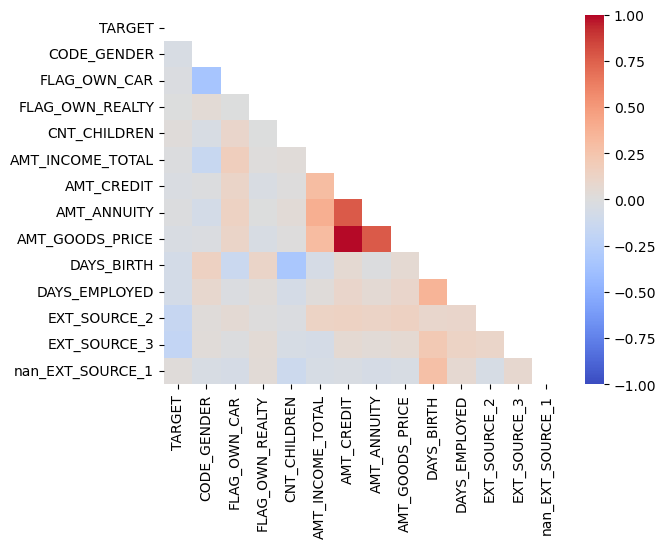

In [28]:
corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [29]:
# on construit la matrice X des Features
X = df.drop(columns="TARGET")
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3,nan_EXT_SOURCE_1
46897,Cash loans,2,1,0,0,157500.0,545040.0,17842.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,29.764384,3.580822,0.610467,0.431192,1
256197,Cash loans,2,0,1,0,157500.0,436032.0,29268.0,360000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,43.632877,5.397260,0.019008,NaN,0
139852,Cash loans,2,0,0,1,144000.0,71316.0,8176.5,63000.0,Family,Working,Secondary / secondary special,Married,House / apartment,43.035616,0.978082,0.613811,0.542445,1
280583,Cash loans,2,0,1,0,90000.0,675000.0,19867.5,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,63.021918,NaN,0.649168,0.554947,1
38907,Cash loans,1,0,0,0,225000.0,1006920.0,39933.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,39.857534,9.221918,0.264635,0.572683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105045,Cash loans,2,0,0,0,157500.0,270000.0,13783.5,270000.0,Children,Pensioner,Secondary / secondary special,Widow,Municipal apartment,60.865753,NaN,0.697425,NaN,0
193587,Cash loans,2,0,1,1,99000.0,107820.0,8473.5,90000.0,Unaccompanied,State servant,Secondary / secondary special,Civil marriage,House / apartment,34.345205,9.134247,0.448123,0.683269,1
25828,Cash loans,2,0,1,0,315000.0,521280.0,44725.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,34.010959,3.602740,0.605344,0.362277,0
106372,Cash loans,2,0,0,0,67500.0,450000.0,27193.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,23.991781,1.693151,0.615644,0.424130,1


In [30]:
# On construit l vecteur y des Targets
y = df["TARGET"]
y

46897     0
256197    1
139852    0
280583    0
38907     0
         ..
105045    0
193587    0
25828     0
106372    0
56667     0
Name: TARGET, Length: 30746, dtype: int64

In [31]:
y.values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""

    # make df
    results = pd.DataFrame(grid.cv_results_)

    # clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]

    if verbose == 2:
        print("coucou")

    return results.round(2)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [34]:
y_train.value_counts(normalize=True)

TARGET
0    0.919901
1    0.080099
Name: proportion, dtype: float64

In [35]:
y_test.value_counts(normalize=True)

TARGET
0    0.920255
1    0.079745
Name: proportion, dtype: float64

## Modelisation

### Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [36]:
numerical_features = [
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    # "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
]

categorical_features = [
    "NAME_CONTRACT_TYPE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    # "OCCUPATION_TYPE",
    # "ORGANIZATION_TYPE",
]

In [37]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder()
)

In [38]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer(
    (numerical_pipeline, numerical_features),
    (categorical_pipeline, categorical_features),
)
ColumnTransformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2',
                                  'EXT_SOURCE_3']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'])])

In [39]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

pipe = Pipeline(
    [
        ("columntransformer", ColumnTransformer),
        #  ("inputer", KNNImputer()),
        #  ("scaler", StandardScaler()),
        ('under_sampler', RandomUnderSampler()),
        ("estimator", DummyClassifier()),
    ]
)

In [40]:
param_grid = {
    "estimator": [
        DummyClassifier(),
        LogisticRegression(),
        RandomForestClassifier(),
    ],
}

In [41]:
grid2 = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    return_train_score=True,
    n_jobs=-1,
    error_score='raise'
)
grid2

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRT...
                                                                                          OneHotEncoder())]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'NAME_TYPE_SUITE',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE'])])),
                                       ('under_sampler', RandomUnderSampler()),
                                       ('estimator', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [DummyClassifier(), LogisticRegression(),
                                       RandomForestClassifier()]},
             return_train_score=True, verbose=2)

In [42]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRT...
                                                                                          OneHotEncoder())]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'NAME_TYPE_SUITE',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE'])])),
                                       ('under_sampler', RandomUnderSampler()),
                                       ('estimator', DummyClassifier())]),
             n_jobs=-1,
             param_grid={'estimator': [DummyClassifier(), LogisticRegression(),
                                       RandomForestClassifier()]},
             return_train_score=True, verbose=2)

In [43]:
resultize(grid2)

coucou


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,19.74,0.48,3.84,0.25,DummyClassifier(),{'estimator': DummyClassifier()},0.92,0.0,1,0.92,0.00
1,18.80,0.70,3.87,0.30,LogisticRegression(),{'estimator': LogisticRegression()},0.67,0.0,2,0.68,0.00
2,19.23,1.80,3.84,0.41,RandomForestClassifier(),{'estimator': RandomForestClassifier()},0.67,0.0,3,0.73,0.01


In [44]:
grid2.cv_results_

{'mean_fit_time': array([19.73640833, 18.79863768, 19.23028183]),
 'std_fit_time': array([0.47690362, 0.70034067, 1.79538786]),
 'mean_score_time': array([3.84317126, 3.86882582, 3.84048986]),
 'std_score_time': array([0.24689117, 0.29945233, 0.41479109]),
 'param_estimator': masked_array(data=[DummyClassifier(), LogisticRegression(),
                    RandomForestClassifier()],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator': DummyClassifier()},
  {'estimator': LogisticRegression()},
  {'estimator': RandomForestClassifier()}],
 'split0_test_score': array([0.91999133, 0.66543799, 0.66760624]),
 'split1_test_score': array([0.91999133, 0.67671292, 0.67194276]),
 'split2_test_score': array([0.9197745 , 0.67801388, 0.67150911]),
 'split3_test_score': array([0.9197745 , 0.67237641, 0.67476149]),
 'split4_test_score': array([0.91997398, 0.67577532, 0.66840165]),
 'mean_test_score': array([0.91990113, 0.6736633 , 0.67084